In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import cartopy.crs as ccrs
#import cartopy.feature as cfeat
#import cartopy.io.img_tiles as cimgt
from sklearn.neighbors import KNeighborsRegressor
#import AISMapPlot as aismap
import pickle

In [48]:

sectors = [0, 1, 2]
sector_borders = [2.2, 3.2, 3.94]
positions = pd.DataFrame([[np.nan, 2.2], [np.nan, 3.2], [np.nan, 3.94]],
                         columns = ['Latitude', 'Longitude'])
    
ais_test = []  
for s in [0,2]:
  
    ais_test.append(pd.read_pickle('FEL-ROT_test_01min_s%d.pkl' % (s)))

In [49]:
time_loaded = []

for s in sectors:
    time_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_time.pkl' % (s), 'rb')))

In [50]:
pos_loaded = []

for s in sectors:
    pos_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_position.pkl' % (s), 'rb')))

In [51]:
cog_loaded = []

for s in sectors:
    cog_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_cog.pkl' % (s), 'rb')))

In [52]:
sog_loaded = []

for s in sectors:
    sog_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_sog.pkl' % (s), 'rb')))

In [53]:

ais_test[0]['0seclat']= pos_loaded[0].predict(ais_test[0][['Latitude','Longitude', 'COG', 'SOG']])
ais_test[0]['0seclon']= sector_borders[0]
ais_test[0]['0secsog']= sog_loaded[0].predict(ais_test[0][['Latitude','Longitude', 'COG', 'SOG']])
ais_test[0]['0seccog']= cog_loaded[0].predict(ais_test[0][['Latitude','Longitude', 'COG', 'SOG']])


ais_test[0]['1seclat']= pos_loaded[1].predict(ais_test[0][['0seclat','0seclon', '0secsog', '0seccog']])
ais_test[0]['1seclon']= sector_borders[1]
ais_test[0]['1secsog']= sog_loaded[1].predict(ais_test[0][['0seclat','0seclon', '0secsog', '0seccog']])
ais_test[0]['1seccog']= cog_loaded[1].predict(ais_test[0][['0seclat','0seclon', '0secsog', '0seccog']])



In [54]:
ais_test[0]['mins'] = (time_loaded[0].predict(ais_test[0][['Latitude','Longitude','COG','SOG']])) + (time_loaded[1].predict(ais_test[0][['0seclat','0seclon', '0secsog', '0seccog']])) + (time_loaded[2].predict(ais_test[0][['1seclat','1seclon','1seccog','1secsog']])) 
# ais_test[1]['mins'] = (time_loaded[1].predict(ais_test[1][['Latitude','Longitude','COG','SOG']])) + (time_loaded[2].predict(ais_test[1][['sector_leave_lat', 'sector_leave_lon', 'sector_leave_cog', 'sector_leave_sog']])) 
ais_test[1]['mins'] = (time_loaded[2].predict(ais_test[1][['Latitude','Longitude','COG','SOG']])) 

In [55]:
predicts = pd.concat([ais_test[0]['mins'],ais_test[1]['mins']])
end = pd.concat([ais_test[0]['remainingMins'], ais_test[1]['remainingMins']])

In [56]:
diff = predicts-end

In [57]:
predicts_frame = (pd.DataFrame({'correct': end, 'predicted': predicts, 'diff': diff}))
predicts_frame['abs_error'] = predicts_frame['diff'].transform(lambda x: abs(x))
predicts_frame = predicts_frame.sort_values('correct')


In [58]:
predicts_frame['abs_error'].describe()

count    198.000000
mean      13.517057
std        8.279213
min        0.119138
25%        5.090135
50%       16.009515
75%       19.841365
max       31.548313
Name: abs_error, dtype: float64

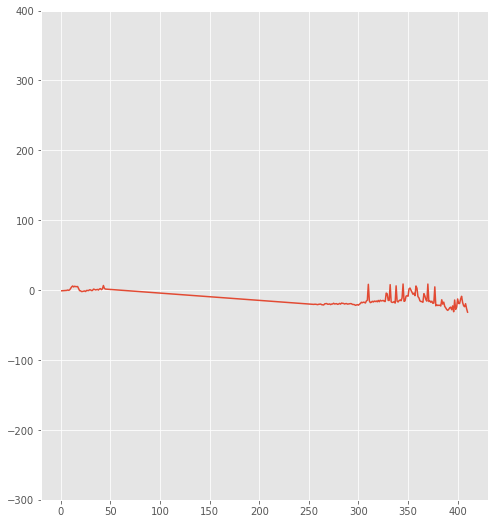

In [59]:
plt.figure(figsize = (8, 9))
axes = plt.gca()
axes.set_ylim([-300,400])
plt.plot(predicts_frame['correct'], predicts_frame['diff'])
plt.savefig('../Images/fel_rot_sectors_mixed.png', dpi = 300, bbox_inches = 'tight')